In [18]:
import numpy as np
import numpy.ma as ma
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy import signal

from PIL import Image

In [19]:
synthetic_dF = np.load('synthetic_dF.npy')

synthetic_dF0 = np.load('synthetic_dF0.npy')

synthetic_a_soma_signal_smooth = np.load('synthetic_a_soma_signal_smooth.npy', allow_pickle = True)
synthetic_a_dendrite_signal_smooth = np.load('synthetic_a_dendrite_signal_smooth.npy', allow_pickle = True)
synthetic_b_soma_signal_smooth = np.load('synthetic_b_soma_signal_smooth.npy', allow_pickle = True)

synthetic_somatic_event1 = np.load('synthetic_somatic_event1.npy', allow_pickle = True)
synthetic_dendritic_event = np.load('synthetic_dendritic_event.npy', allow_pickle = True)
synthetic_somatic_event2 = np.load('synthetic_somatic_event2.npy', allow_pickle = True)

synthetic_spikes_a_soma = np.load('synthetic_spikes_a_soma.npy', allow_pickle = True)
synthetic_spikes_a_dendrite = np.load('synthetic_spikes_a_dendrite.npy', allow_pickle = True)
synthetic_spikes_b_soma = np.load('synthetic_spikes_b_soma.npy', allow_pickle = True)

synthetic_raw_signal_a_soma = np.load('synthetic_raw_signal_a_soma.npy',allow_pickle = True)
synthetic_raw_signal_a_dendrite = np.load('synthetic_raw_signal_a_dendrite.npy',allow_pickle = True)
synthetic_raw_signal_b_soma = np.load('synthetic_raw_signal_b_soma.npy',allow_pickle = True)

synthetic_a_soma_roi = np.load('synthetic_a_soma_roi.npy',allow_pickle = True)
synthetic_a_dendrite_roi = np.load('synthetic_a_dendrite_roi.npy',allow_pickle = True)
synthetic_b_soma_roi = np.load('synthetic_b_soma_roi.npy',allow_pickle = True)

masks_main = np.load('masks.npy', allow_pickle = True)

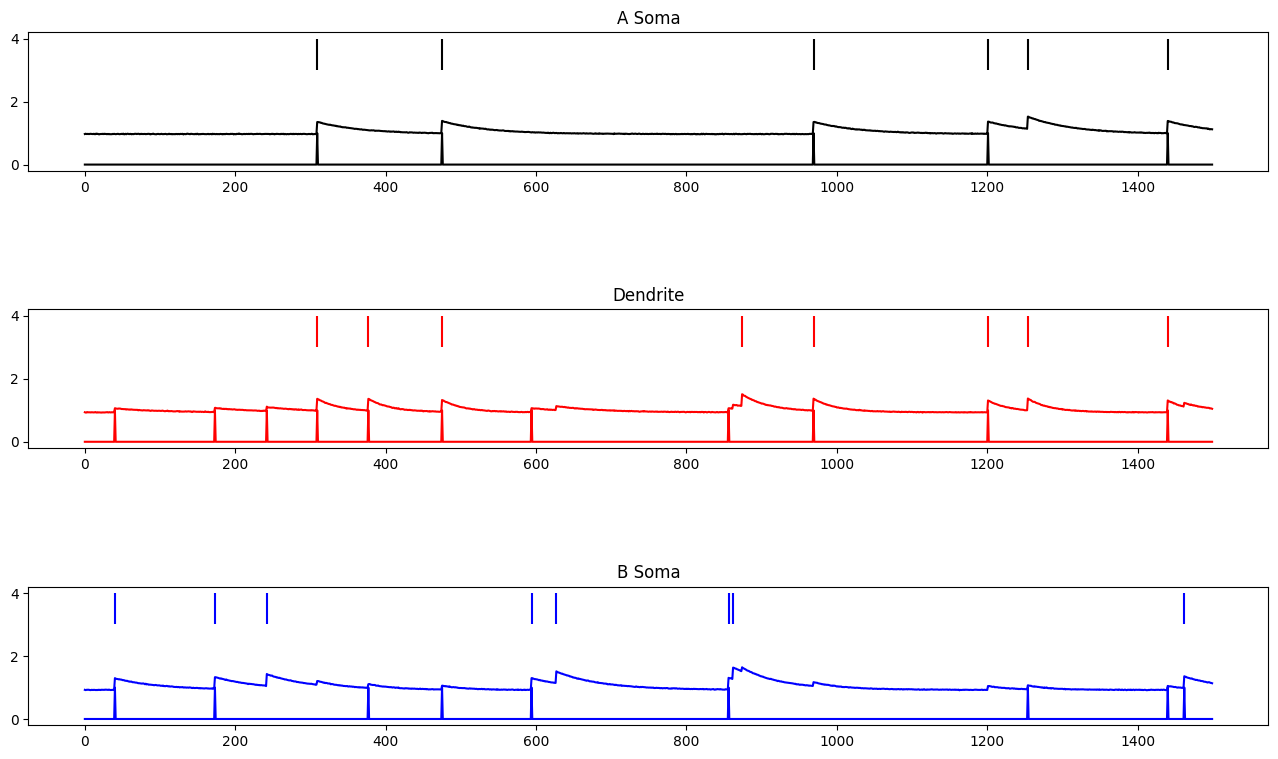

In [20]:
#%matplotlib
fig, axs = plt.subplots(3, 1,figsize=(16,9))
plt.subplots_adjust(hspace=1)

axs[0].vlines(np.flatnonzero(synthetic_spikes_a_soma), 3, 4, 'k')
axs[1].vlines(np.flatnonzero(synthetic_spikes_a_dendrite), 3, 4, 'r')
axs[2].vlines(np.flatnonzero(synthetic_spikes_b_soma), 3, 4, 'b')

axs[0].plot(synthetic_a_soma_signal_smooth, 'k')
axs[0].plot(synthetic_somatic_event1, 'k')
axs[1].plot(synthetic_a_dendrite_signal_smooth, 'r')
axs[1].plot(synthetic_dendritic_event, 'r')
axs[2].plot(synthetic_b_soma_signal_smooth, 'b')
axs[2].plot(synthetic_somatic_event2 , 'b')
axs[0].title.set_text('A Soma')
axs[1].title.set_text('Dendrite')
axs[2].title.set_text('B Soma')

In [21]:
# plt.plot(synthetic_a_dendrite_signal_smooth, '-r')

In [22]:
a_soma_source_prof = synthetic_dF[3:11,5:13,:]
a_dendrite_source_prof = synthetic_dF[9:20,6:12,:]
b_soma_source_prof = synthetic_dF[11:19,8:16,:]

synthetic_a_soma_base_profile = synthetic_a_soma_roi[3:11,5:13]
synthetic_a_dendrite_base_profile = synthetic_a_dendrite_roi[9:20,6:12]
synthetic_b_soma_base_profile = synthetic_b_soma_roi[11:19,8:16]

In [23]:
def size(signal):   
    signal_zero = 0                                                                                                                                                
    for x in signal:                                                                                                                                          
        if x == 0 and signal_zero > 0:                                                                                                                             
            yield signal_zero 
            signal_zero = 0
        if x == 1:
            signal_zero += 1
    if signal_zero > 0:
            yield signal_zero
            
def coordinates_and_min(signal):
    transient_coordinates = np.where(signal);
    output = []
    trans_L_minimum = min(np.asarray(list(size(signal))))
    trans_L_sizes = np.asarray(list(size(signal)))
    print(trans_L_minimum)
    print(trans_L_sizes)
    return transient_coordinates

def get_list(transient_coordinates):
    arr = coordinates_and_min(transient_coordinates)
    arr = np.array(arr)
    N_tran = np.size(arr)
    transient_data = arr.reshape(N_tran,)
    transient_data = list(transient_data)
    return transient_data

In [24]:
def transient_event_detector(signal, theta_upper = 1.04, theta_lower = 1): 
    
    N = len(signal)
    
    event = np.zeros(N)
    
    for i in np.arange(N):
        if (signal[i] > theta_upper):
            event[i] = 1 
        if (signal[i] < theta_lower):
            event[i] = 0
        else:
            event[i] = 1
            
    return event

In [25]:
# theta = 1.04
signal_og = synthetic_a_dendrite_signal_smooth
signal_over_theta = transient_event_detector(signal_og, 1.04, 1)

transient_data = get_list(signal_over_theta)

1
[ 31   4   1   1  42  54   1   1  64  59  54  99   1 102   2   2  60   1
   1 110  60]


In [26]:
MAX_SEQ = 5

def get_seq_len(transient_data, index):
    if index == len(transient_data)-1:
        return 1
    length = 0
    while (index + length + 1 < len(transient_data)) and (transient_data[index + length + 1] == transient_data[index + length]+1):
        length += 1
    return length+1

i = 0
output_transient_data = []
while i<len(transient_data):
    current_seq_len = get_seq_len(transient_data, i)
    current_seq_len = current_seq_len
    #print(current_seq_len, end=" ")
    if current_seq_len > MAX_SEQ:
        output_transient_data += transient_data[i:i+current_seq_len]
    i+=current_seq_len
print(output_transient_data)

[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 

In [27]:
def consecutiveRanges(a, n):
    
    length = 1
    lista_lower = []
    lista_upper = []
     
    if (n == 0):
        return lista
     
    for i in range (1, n + 1):    
        if (i == n or a[i] - a[i - 1] != 1): 
            
            if (length == 1):
                lista.append(a[i - length])   
            else:
                temp_lower = a[i - length]
                temp_upper = a[i - 1]
                lista_lower.append(temp_lower)
                lista_upper.append(temp_upper)
           
            length = 1
        
        else:
            length += 1
    return lista_lower, lista_upper

In [28]:
ranges_array_pre = output_transient_data.copy()
z = len(ranges_array_pre)
consecutiveRanges(ranges_array_pre, z)

([40, 173, 242, 309, 377, 475, 594, 856, 969, 1201, 1440],
 [70, 214, 295, 372, 435, 528, 692, 957, 1028, 1310, 1499])

In [29]:
def transient_profile(transient_signal, source_profile, base_pic, start = 1, finish = 1, step_size = 1):
    
    if finish >= 1499:
        finish = 1499-5
    
    index = np.arange(start-5, finish+5, step_size)
    index_len = np.arange(0,len(index),1)
    transient = transient_signal[index]
    source_profile = source_profile[:,:,index]
    W = transient * source_profile #weighted_frames
    transient_pic = np.sum(W[:,:,index_len],axis=2)
    normalized_trans_pic = transient_pic/sum(transient**2)
    cor = np.mean(ma.corrcoef(ma.masked_invalid(base_pic), ma.masked_invalid(normalized_trans_pic)))
    cor = np.round(cor, 3)
    trans = normalized_trans_pic
    return base_pic, trans, cor

In [30]:
lista_lower, lista_upper = consecutiveRanges(ranges_array_pre, z)

In [31]:
def poster(index_start = 0, index_stop = 0):
    
    base_pic, trans, cor = transient_profile(synthetic_a_dendrite_signal_smooth, a_dendrite_source_prof, synthetic_a_dendrite_base_profile, index_start, index_stop, 1)
    
    fig = plt.figure()
    fig.set_figheight(18)
    fig.set_figwidth(9)
    plt.subplots_adjust(hspace=0.5)

    rows = 5
    columns = 3

    interval_min = 5
    interval_max = index_stop-index_start+6

    #1
    fig.add_subplot(rows, columns, 1,)
    plt.imshow(masks_main)
    plt.title('Total view \n'.format(cor), fontsize =15)

    #2
    fig.add_subplot(rows, columns, 2)
    plt.imshow(base_pic)
    plt.title('A dendrite mask \n', fontsize =15)

    #3
    ax = fig.add_subplot(rows, columns, 3)
    ax.imshow(trans)
    plt.title('Transient profile \n r = {0}'.format(cor), fontsize =15)

    if cor >= 0.5:
        ax.spines["top"].set_color("red")
        ax.spines["left"].set_color("red")
        ax.spines["right"].set_color("red")
        ax.spines["bottom"].set_color("red")
        ax.spines["top"].set_linewidth(5)
        ax.spines["left"].set_linewidth(5)
        ax.spines["right"].set_linewidth(5)
        ax.spines["bottom"].set_linewidth(5)

    #4
    fig.add_subplot(rows, columns, 4)
    plt.plot(synthetic_a_soma_signal_smooth[index_start-5:index_stop+5], 'k')
    plt.title('A Soma', fontsize = 15)
    plt.vlines(x = interval_min, ymin = 0.8, ymax = 1.4, colors = 'orange', label = 'vline_multiple - full height')
    plt.vlines(x = interval_max, ymin = 0.8, ymax = 1.4, colors = 'orange', label = 'vline_multiple - full height')

    #5
    fig.add_subplot(rows, columns, 5)
    plt.plot(synthetic_a_dendrite_signal_smooth[index_start-5:index_stop+5], 'r')
    plt.title('A Dendrite', fontsize = 15)
    plt.vlines(x = interval_min, ymin = 0.8, ymax = 1.4, colors = 'orange', label = 'vline_multiple - full height')
    plt.vlines(x = interval_max, ymin = 0.8, ymax = 1.4, colors = 'orange', label = 'vline_multiple - full height')

    #6
    fig.add_subplot(rows, columns, 6)
    plt.plot(synthetic_b_soma_signal_smooth[index_start-5:index_stop+5], 'b')
    plt.title('B Soma', fontsize = 15)
    plt.vlines(x = interval_min, ymin = 0.8, ymax = 1.4, colors = 'orange', label = 'vline_multiple - full height')
    plt.vlines(x = interval_max, ymin = 0.8, ymax = 1.4, colors = 'orange', label = 'vline_multiple - full height')

In [32]:
def multiposter(list_a, list_b):
    cor_list = []
    n = len(list_a)
    for i,j in zip(range(n), range(n)):
            poster(list_a[i],list_b[j])

In [33]:
def cor_coefs(list_a, list_b):
    cor_list = []
    n = len(list_a)
    for i in range(n):
        base_pic, trans, cor = transient_profile(synthetic_a_dendrite_signal_smooth, a_dendrite_source_prof, synthetic_a_dendrite_base_profile, list_a[i], list_b[i], 1)
        cor_list.append(cor)
    return cor_list

In [34]:
cor_list = cor_coefs(lista_lower, lista_upper)
cor_list

[0.283, 0.271, 0.327, 0.793, 0.754, 0.826, 0.32, 0.542, 0.834, 0.894, 0.661]

In [35]:
# dendritic_poster = multiposter(lista_lower, lista_upper)
# dendritic_potser = np.save('transients/final_transients/dendritic_poster.npy', dendritic_poster)